# Final ERCOT Dataset Analysis

This notebook analyzes the final_ercot_dataset.csv with comprehensive EDA similar to the preliminary analysis.

## 1. Import and Load Final Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the final dataset
print("Loading final_ercot_dataset.csv...")
final_dataset = pd.read_csv("../Data/ERCOT Data/final_ercot_dataset.csv")

print(f"Dataset shape: {final_dataset.shape}")
print(f"Columns: {final_dataset.columns.tolist()}")
print("\nFirst 5 rows:")
print(final_dataset.head())
print("\nData types:")
print(final_dataset.dtypes)
print("\nMissing values:")
print(final_dataset.isna().sum())

Loading final_ercot_dataset.csv...
Dataset shape: (24117, 9)
Columns: ['Hour Ending', 'Target_Price', 'ERCOT.LOAD', 'ERCOT.WIND.GEN', 'Wind Output, % of Load', 'Wind Output, % of Installed', 'Wind 1-hr MW change', 'Wind 1-hr % change', 'WEST_Load']

First 5 rows:
        Hour Ending  Target_Price    ERCOT.LOAD  ERCOT.WIND.GEN  \
0  01/01/2023 01:00         10.81  35829.306163    21753.284477   
1  01/01/2023 02:00          9.61  35245.390234    21570.395694   
2  01/01/2023 03:00          9.14  34599.761810    21036.504013   
3  01/01/2023 04:00          9.18  34227.151061    20595.481515   
4  01/01/2023 05:00          9.48  34093.414143    20387.843555   

   Wind Output, % of Load  Wind Output, % of Installed  Wind 1-hr MW change  \
0               60.713664                    59.019167                  NaN   
1               61.200615                    58.522968          -182.888783   
2               60.799563                    57.074459          -533.891682   
3               6

## 2. Data Preprocessing

In [2]:
# Convert date column to datetime
final_dataset['Hour Ending'] = pd.to_datetime(final_dataset['Hour Ending'])
final_dataset['DeliveryDate'] = final_dataset['Hour Ending'].dt.date
final_dataset['DayOfWeek'] = final_dataset['Hour Ending'].dt.day_name()
final_dataset['Month'] = final_dataset['Hour Ending'].dt.month_name()
final_dataset['Year'] = final_dataset['Hour Ending'].dt.year
final_dataset['Hour'] = final_dataset['Hour Ending'].dt.hour

print(f"Date range: {final_dataset['Hour Ending'].min()} to {final_dataset['Hour Ending'].max()}")
print(f"Total data points: {len(final_dataset):,}")
print(f"Years covered: {final_dataset['Year'].nunique()}")

Date range: 2022-01-02 01:00:00 to 2024-12-31 22:00:00
Total data points: 24,117
Years covered: 3


## 3. Comprehensive EDA (Similar to Preliminary Analysis)

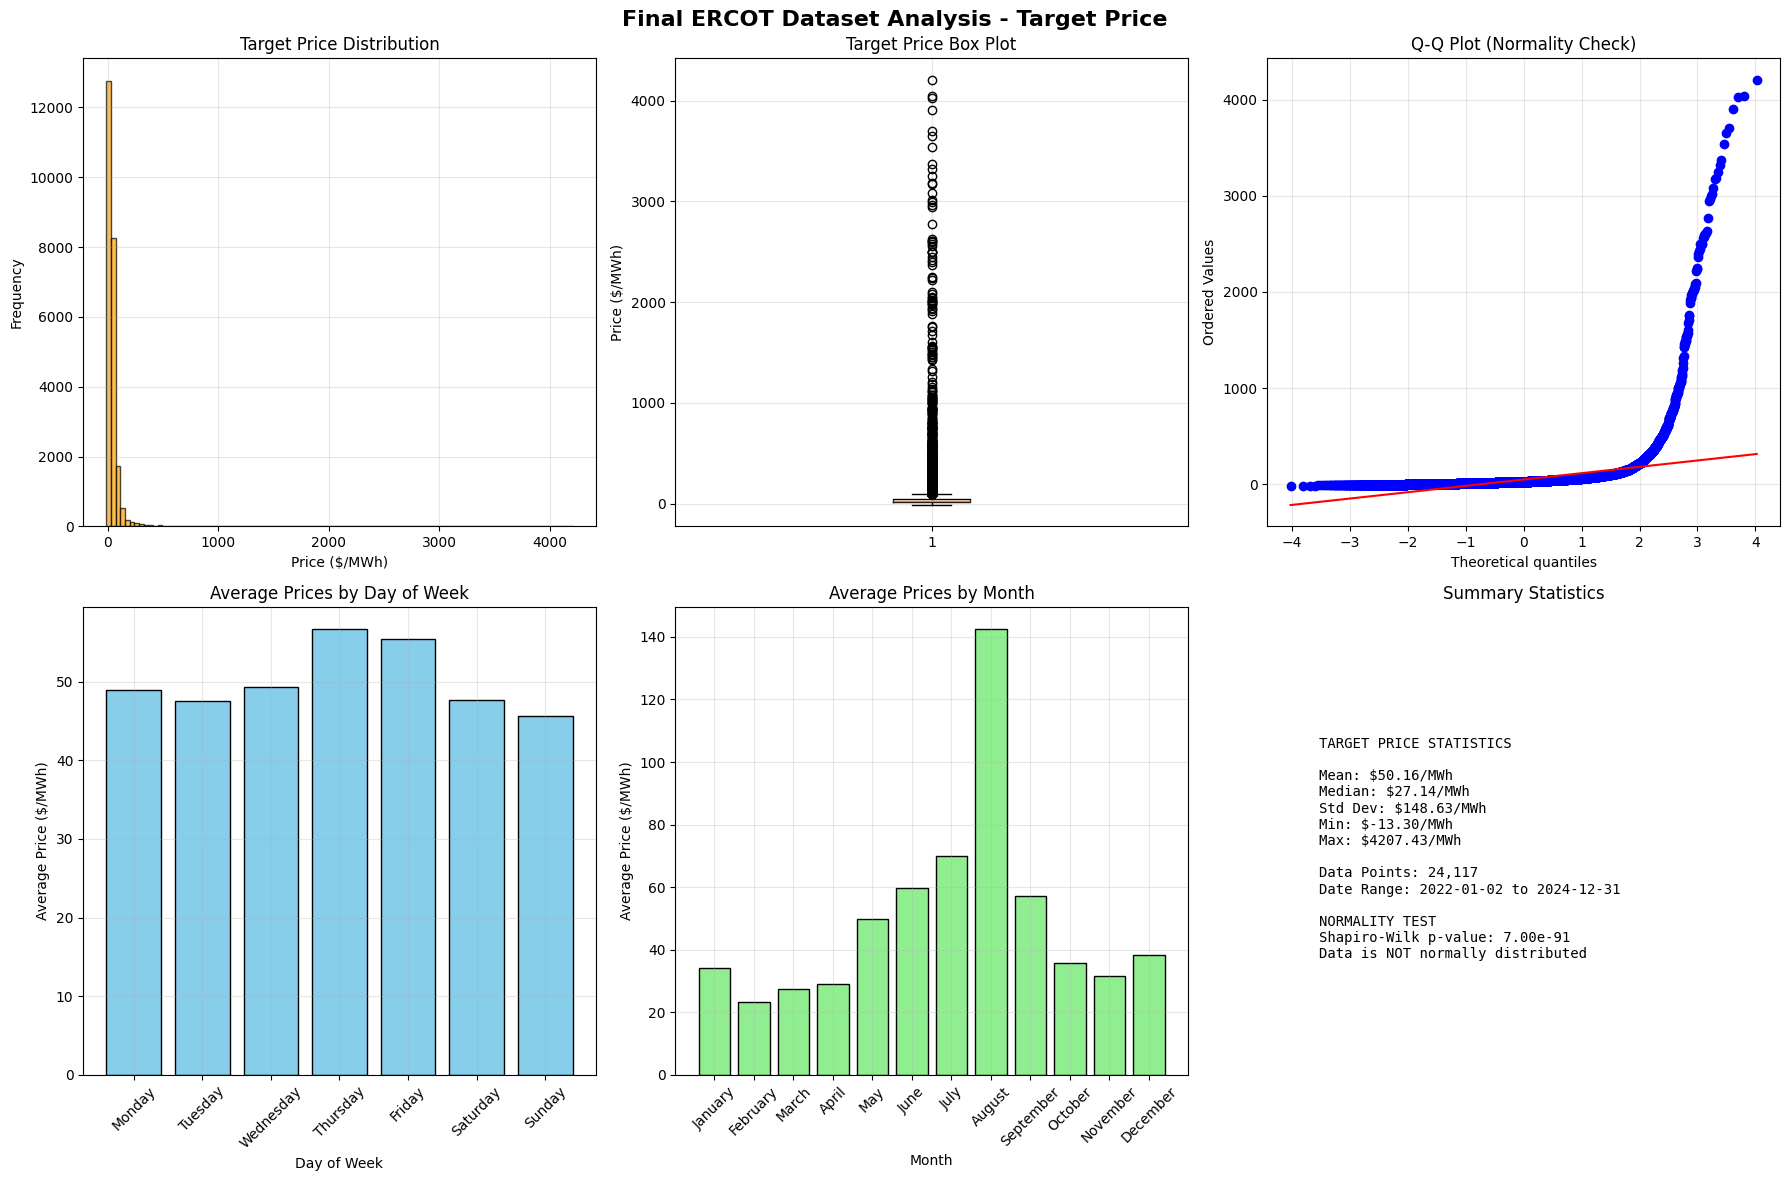

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Final ERCOT Dataset Analysis - Target Price', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(final_dataset['Target_Price'], bins=100, alpha=0.7, color='orange', edgecolor='black')
axes[0, 0].set_xlabel('Price ($/MWh)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Target Price Distribution')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
axes[0, 1].boxplot(final_dataset['Target_Price'])
axes[0, 1].set_ylabel('Price ($/MWh)')
axes[0, 1].set_title('Target Price Box Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot
stats.probplot(final_dataset['Target_Price'], dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot (Normality Check)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Average prices by day of week
day_avg = final_dataset.groupby('DayOfWeek')['Target_Price'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg = day_avg.reindex(day_order)

axes[1, 0].bar(day_avg.index, day_avg.values, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Price ($/MWh)')
axes[1, 0].set_title('Average Prices by Day of Week')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 5. Average prices by month
month_avg = final_dataset.groupby('Month')['Target_Price'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_avg = month_avg.reindex(month_order)

axes[1, 1].bar(month_avg.index, month_avg.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Price ($/MWh)')
axes[1, 1].set_title('Average Prices by Month')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# 6. Summary statistics as text
stats_text = f"""
TARGET PRICE STATISTICS

Mean: ${final_dataset['Target_Price'].mean():.2f}/MWh
Median: ${final_dataset['Target_Price'].median():.2f}/MWh
Std Dev: ${final_dataset['Target_Price'].std():.2f}/MWh
Min: ${final_dataset['Target_Price'].min():.2f}/MWh
Max: ${final_dataset['Target_Price'].max():.2f}/MWh

Data Points: {len(final_dataset):,}
Date Range: {final_dataset['Hour Ending'].min().strftime('%Y-%m-%d')} to {final_dataset['Hour Ending'].max().strftime('%Y-%m-%d')}
"""

# Normality test
try:
    shapiro_stat, shapiro_p = stats.shapiro(final_dataset['Target_Price'].sample(min(5000, len(final_dataset))))
    normality_text = f"\nNORMALITY TEST\nShapiro-Wilk p-value: {shapiro_p:.2e}\n"
    if shapiro_p < 0.05:
        normality_text += "Data is NOT normally distributed"
    else:
        normality_text += "Data appears normally distributed"
except:
    normality_text = "\nNORMALITY TEST\nCould not perform Shapiro-Wilk test"

axes[1, 2].text(0.1, 0.5, stats_text + normality_text, transform=axes[1, 2].transAxes, 
                fontsize=10, verticalalignment='center', fontfamily='monospace')
axes[1, 2].set_title('Summary Statistics')
axes[1, 2].axis('off')  

plt.tight_layout()
plt.show()

## 4. Time Series Analysis

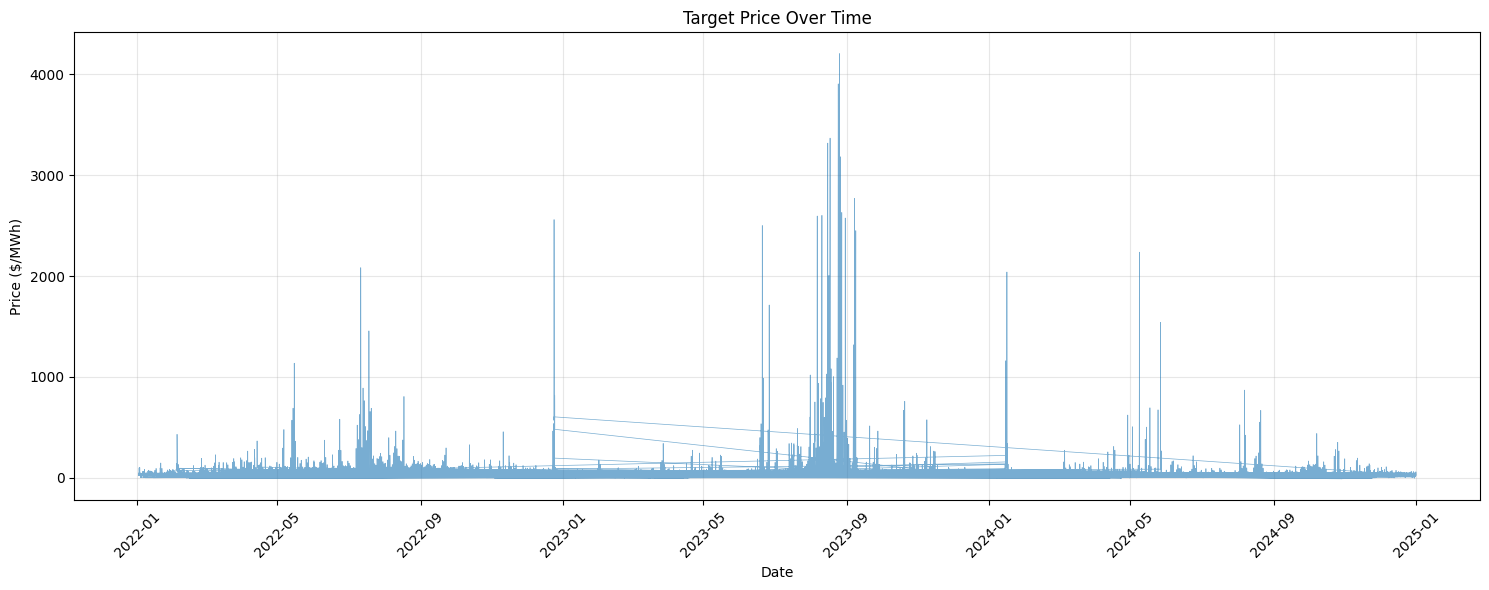

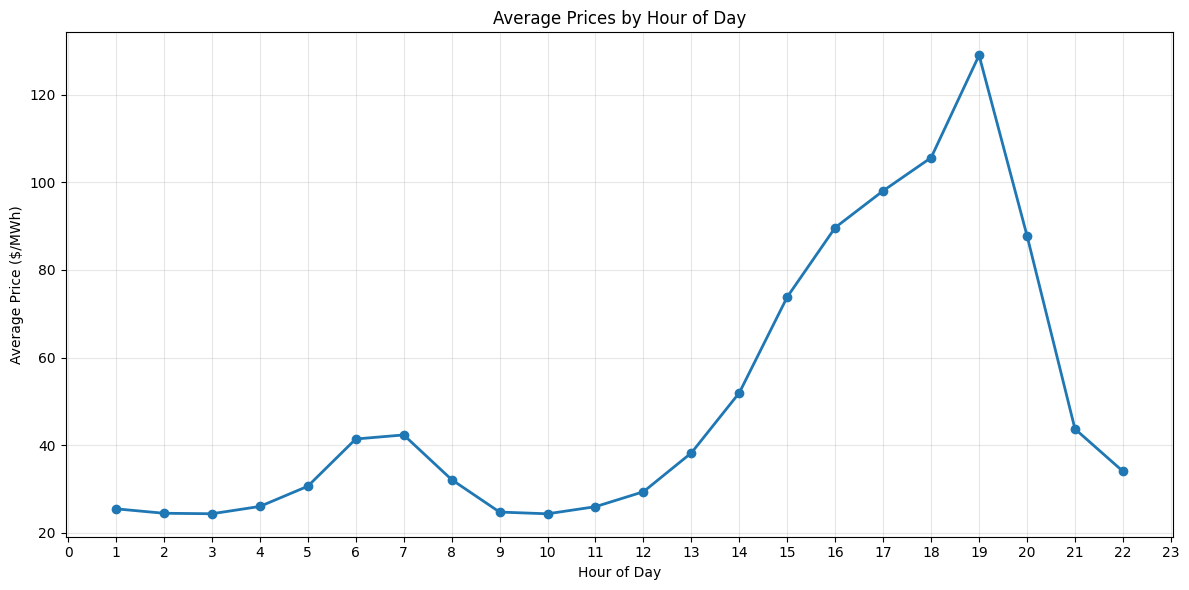

In [4]:
# Time series plot
plt.figure(figsize=(15, 6))
plt.plot(final_dataset['Hour Ending'], final_dataset['Target_Price'], alpha=0.6, linewidth=0.5)
plt.title('Target Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/MWh)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average prices by hour of day
hour_avg = final_dataset.groupby('Hour')['Target_Price'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hour_avg.index, hour_avg.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($/MWh)')
plt.title('Average Prices by Hour of Day')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

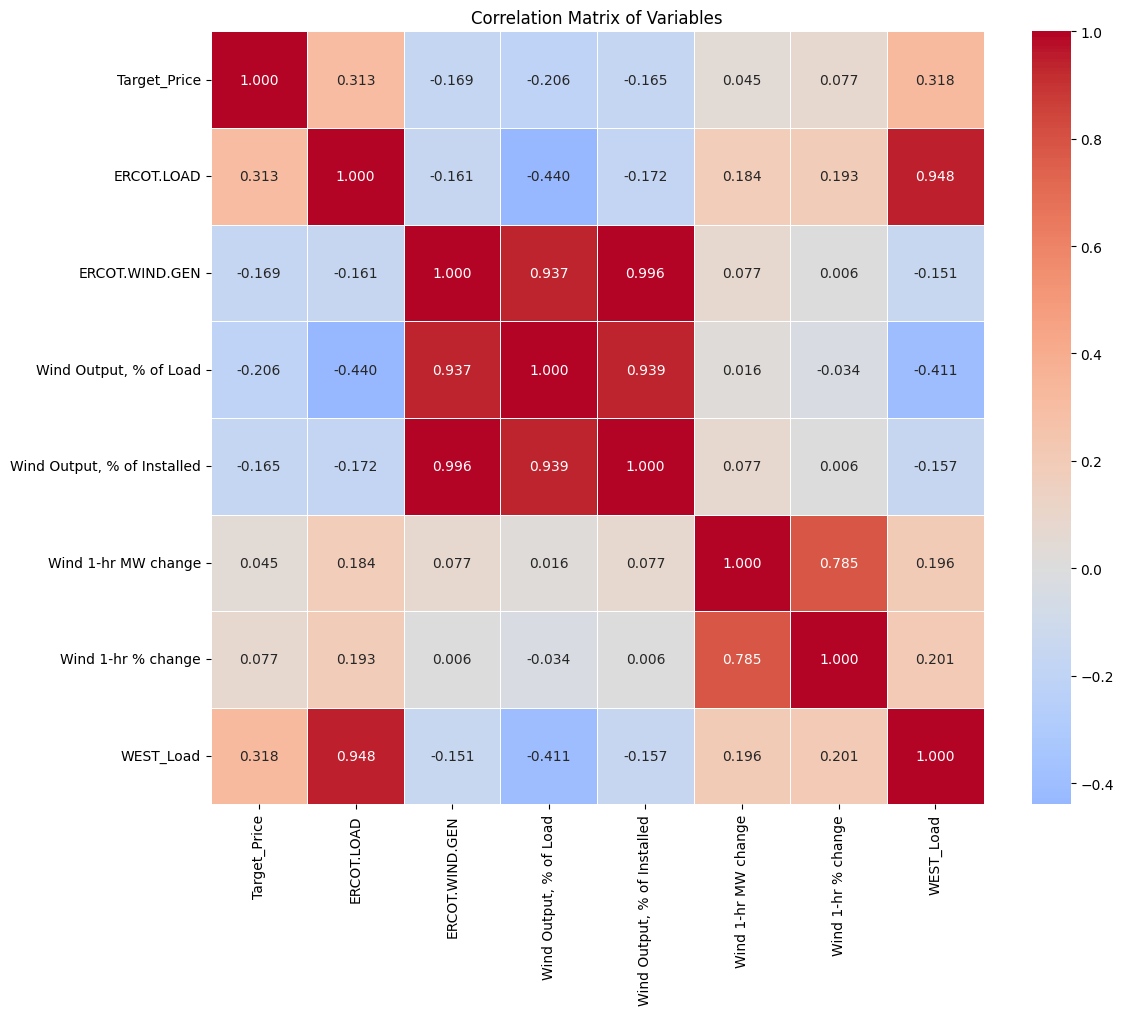

In [5]:
# Correlation matrix
numeric_columns = ['Target_Price', 'ERCOT.LOAD', 'ERCOT.WIND.GEN', 'Wind Output, % of Load', 
                   'Wind Output, % of Installed', 'Wind 1-hr MW change', 'Wind 1-hr % change', 'WEST_Load']
correlation_matrix = final_dataset[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

## 6. Price Spike Analysis

PRICE SPIKE ANALYSIS:
 Threshold  Count  Percentage   Avg_Price
        50   5655   23.448190  141.101411
       100   1704    7.065555  312.159707
       200    621    2.574947  626.743333
       500    202    0.837583 1302.592525
      1000     92    0.381474 2042.219348


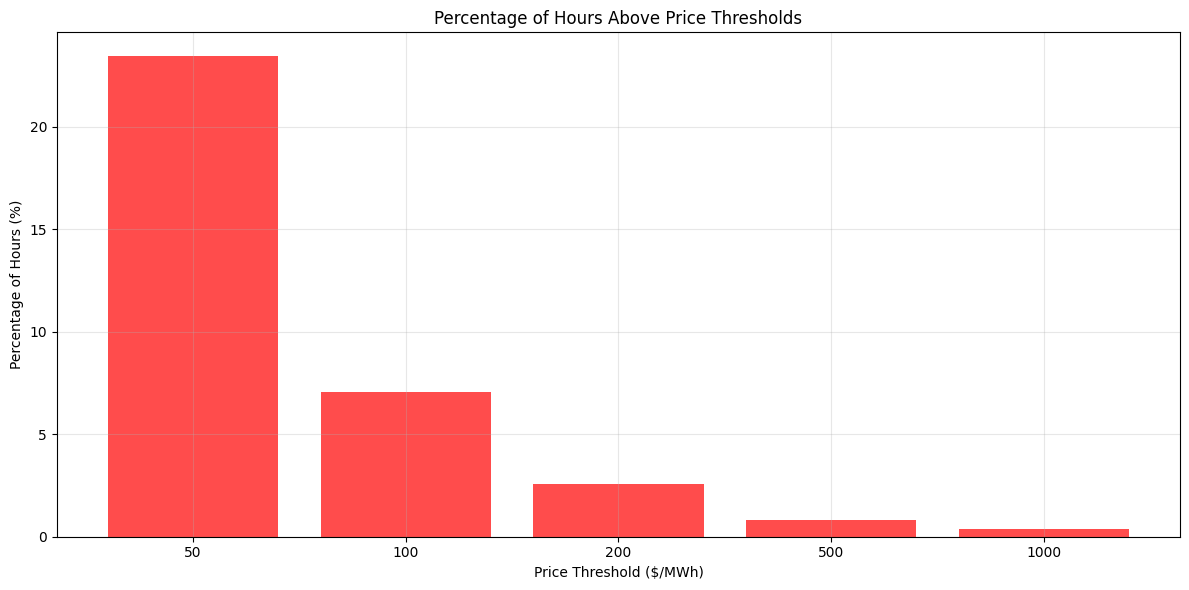

In [6]:
# Price spike analysis
price_thresholds = [50, 100, 200, 500, 1000]
spike_analysis = []

for threshold in price_thresholds:
    spike_count = len(final_dataset[final_dataset['Target_Price'] > threshold])
    spike_percentage = (spike_count / len(final_dataset)) * 100
    avg_spike_price = final_dataset[final_dataset['Target_Price'] > threshold]['Target_Price'].mean()
    spike_analysis.append({
        'Threshold': threshold,
        'Count': spike_count,
        'Percentage': spike_percentage,
        'Avg_Price': avg_spike_price
    })

spike_df = pd.DataFrame(spike_analysis)
print("PRICE SPIKE ANALYSIS:")
print(spike_df.to_string(index=False))

# Visualize price spikes
plt.figure(figsize=(12, 6))
plt.bar(spike_df['Threshold'].astype(str), spike_df['Percentage'], color='red', alpha=0.7)
plt.xlabel('Price Threshold ($/MWh)')
plt.ylabel('Percentage of Hours (%)')
plt.title('Percentage of Hours Above Price Thresholds')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Relationships

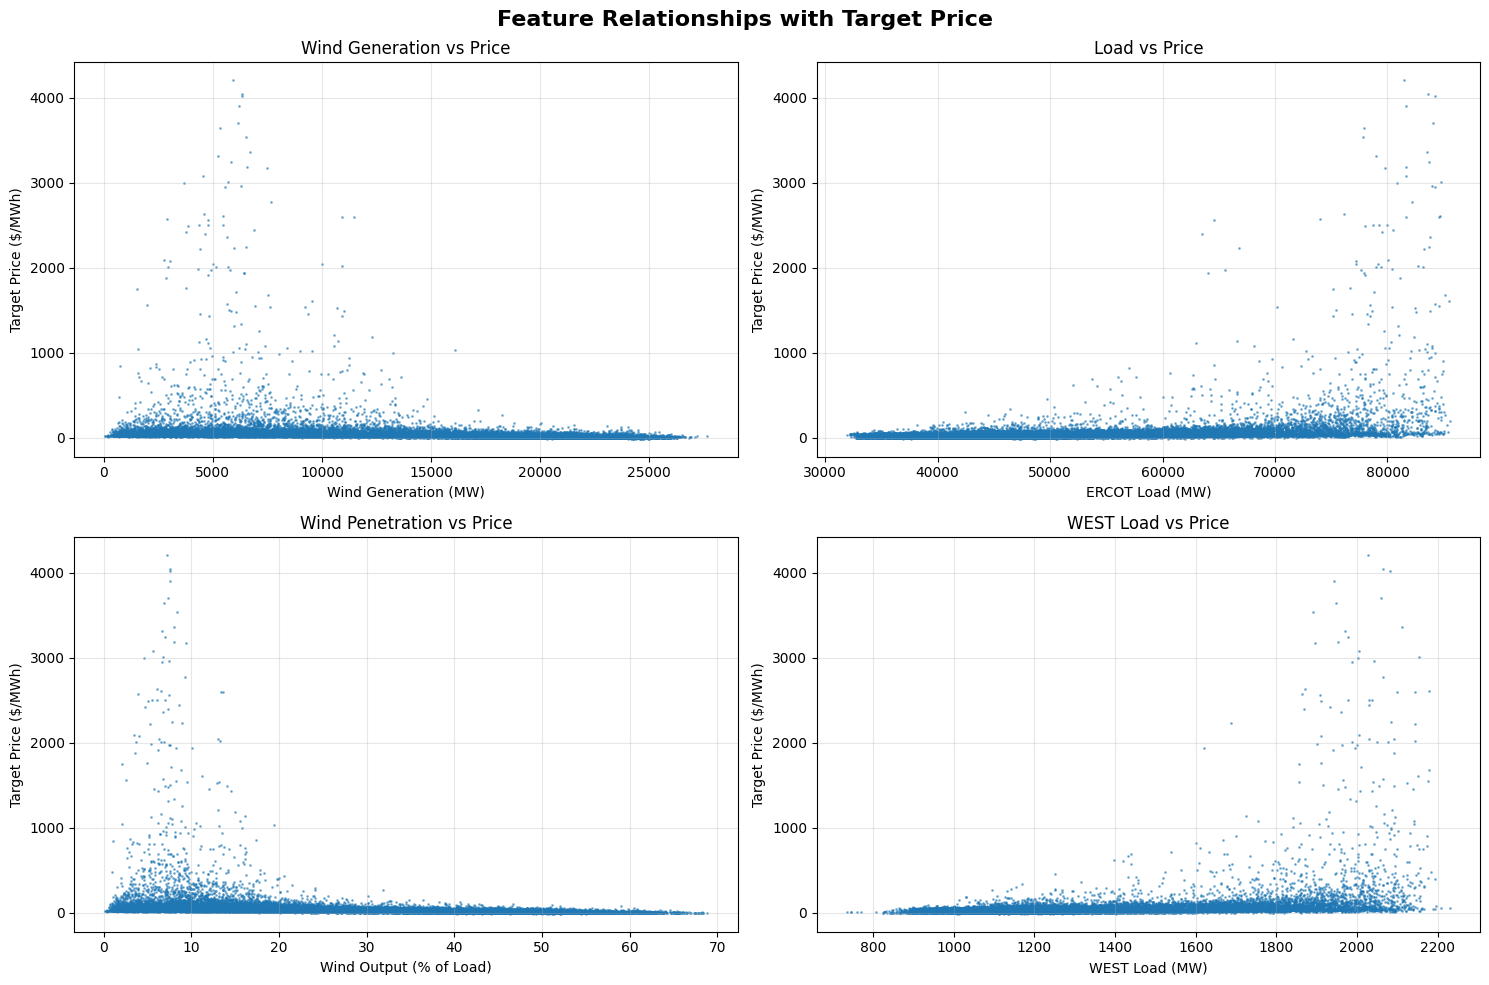

In [7]:
# Feature relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Relationships with Target Price', fontsize=16, fontweight='bold')

# Wind Generation vs Price
axes[0, 0].scatter(final_dataset['ERCOT.WIND.GEN'], final_dataset['Target_Price'], alpha=0.5, s=1)
axes[0, 0].set_xlabel('Wind Generation (MW)')
axes[0, 0].set_ylabel('Target Price ($/MWh)')
axes[0, 0].set_title('Wind Generation vs Price')
axes[0, 0].grid(True, alpha=0.3)

# Load vs Price
axes[0, 1].scatter(final_dataset['ERCOT.LOAD'], final_dataset['Target_Price'], alpha=0.5, s=1)
axes[0, 1].set_xlabel('ERCOT Load (MW)')
axes[0, 1].set_ylabel('Target Price ($/MWh)')
axes[0, 1].set_title('Load vs Price')
axes[0, 1].grid(True, alpha=0.3)

# Wind % of Load vs Price
axes[1, 0].scatter(final_dataset['Wind Output, % of Load'], final_dataset['Target_Price'], alpha=0.5, s=1)
axes[1, 0].set_xlabel('Wind Output (% of Load)')
axes[1, 0].set_ylabel('Target Price ($/MWh)')
axes[1, 0].set_title('Wind Penetration vs Price')
axes[1, 0].grid(True, alpha=0.3)

# WEST Load vs Price
axes[1, 1].scatter(final_dataset['WEST_Load'], final_dataset['Target_Price'], alpha=0.5, s=1)
axes[1, 1].set_xlabel('WEST Load (MW)')
axes[1, 1].set_ylabel('Target Price ($/MWh)')
axes[1, 1].set_title('WEST Load vs Price')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Feature Distributions

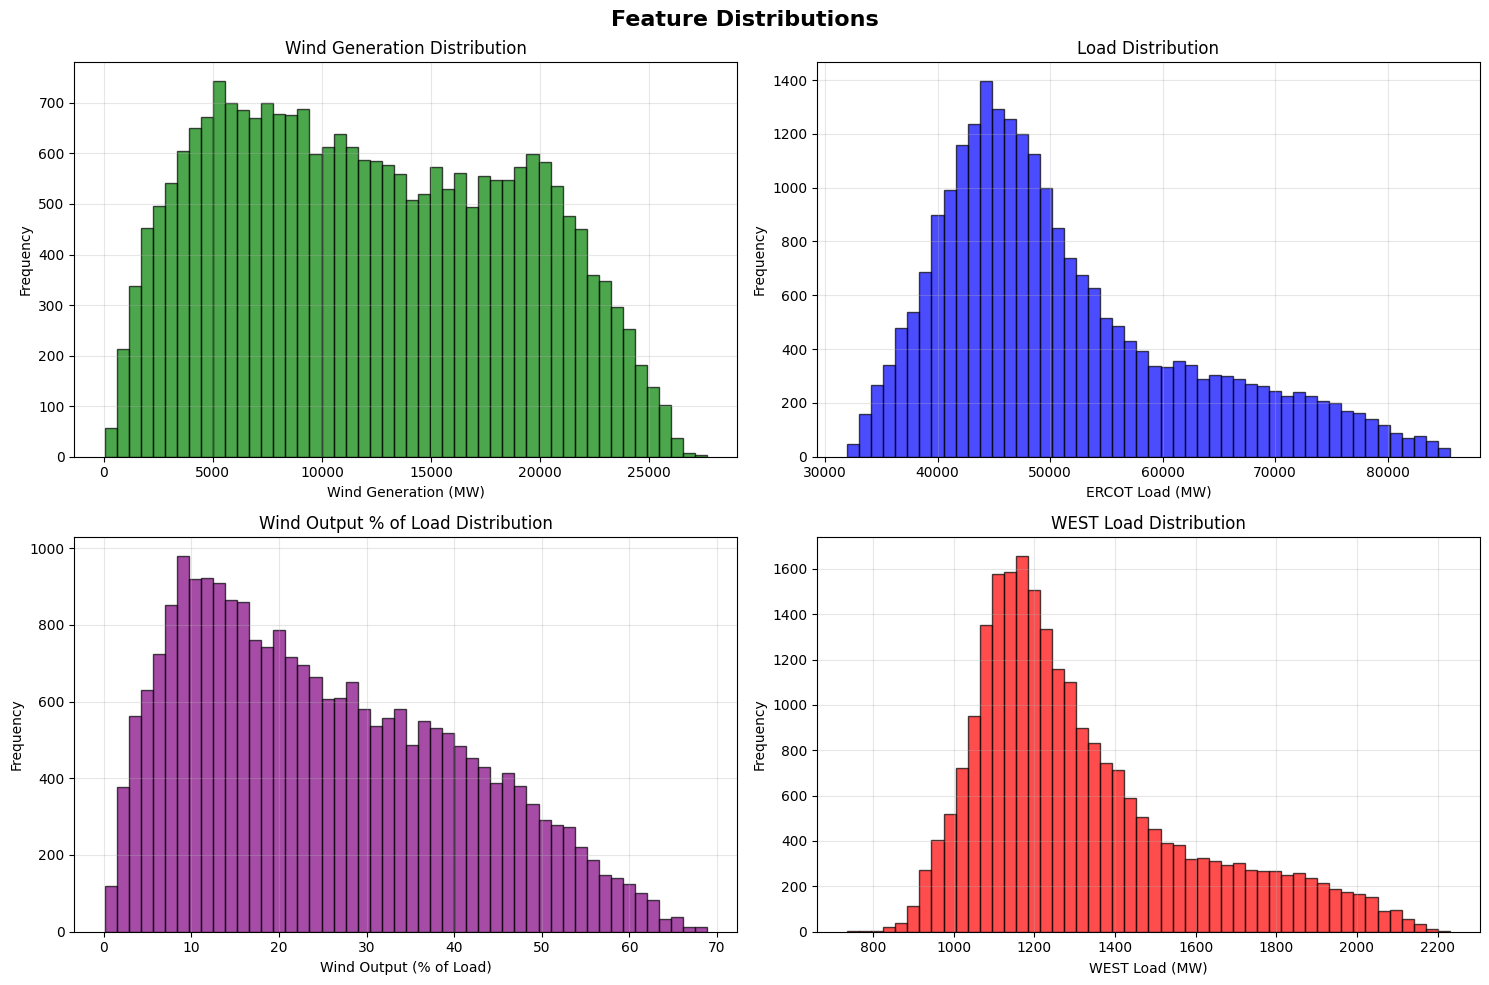

In [8]:
# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

# Wind Generation
axes[0, 0].hist(final_dataset['ERCOT.WIND.GEN'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 0].set_xlabel('Wind Generation (MW)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Wind Generation Distribution')
axes[0, 0].grid(True, alpha=0.3)

# Load
axes[0, 1].hist(final_dataset['ERCOT.LOAD'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].set_xlabel('ERCOT Load (MW)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Load Distribution')
axes[0, 1].grid(True, alpha=0.3)

# Wind % of Load
axes[1, 0].hist(final_dataset['Wind Output, % of Load'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_xlabel('Wind Output (% of Load)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Wind Output % of Load Distribution')
axes[1, 0].grid(True, alpha=0.3)

# WEST Load
axes[1, 1].hist(final_dataset['WEST_Load'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1, 1].set_xlabel('WEST Load (MW)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('WEST Load Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Summary and Key Insights

In [9]:
print("FINAL DATASET SUMMARY:")
print("=" * 50)
print(f"Dataset Shape: {final_dataset.shape}")
print(f"Date Range: {final_dataset['Hour Ending'].min()} to {final_dataset['Hour Ending'].max()}")
print(f"Total Hours: {len(final_dataset):,}")
print(f"Years: {final_dataset['Year'].nunique()}")
print()

print("TARGET PRICE STATISTICS:")
print("=" * 30)
print(f"Mean: ${final_dataset['Target_Price'].mean():.2f}/MWh")
print(f"Median: ${final_dataset['Target_Price'].median():.2f}/MWh")
print(f"Std Dev: ${final_dataset['Target_Price'].std():.2f}/MWh")
print(f"Min: ${final_dataset['Target_Price'].min():.2f}/MWh")
print(f"Max: ${final_dataset['Target_Price'].max():.2f}/MWh")
print()

print("PRICE SPIKE OPPORTUNITIES:")
print("=" * 30)
for _, row in spike_df.iterrows():
    print(f"${row['Threshold']}+ prices: {row['Count']:,} hours ({row['Percentage']:.1f}%)")
print()

print("KEY FEATURES AVAILABLE:")
print("=" * 25)
for col in final_dataset.columns:
    if col not in ['Hour Ending', 'DeliveryDate', 'DayOfWeek', 'Month', 'Year', 'Hour']:
        print(f"- {col}")

print("\nThis dataset is ready for LSTM model training with multiple features!")
print("Key advantages over preliminary data:")
print("- 3 years of data vs limited period")
print("- Multiple features (wind, load, wind penetration)")
print("- Rich feature engineering already done")
print("- Clear price spike patterns for arbitrage opportunities")

FINAL DATASET SUMMARY:
Dataset Shape: (24117, 14)
Date Range: 2022-01-02 01:00:00 to 2024-12-31 22:00:00
Total Hours: 24,117
Years: 3

TARGET PRICE STATISTICS:
Mean: $50.16/MWh
Median: $27.14/MWh
Std Dev: $148.63/MWh
Min: $-13.30/MWh
Max: $4207.43/MWh

PRICE SPIKE OPPORTUNITIES:
$50.0+ prices: 5,655.0 hours (23.4%)
$100.0+ prices: 1,704.0 hours (7.1%)
$200.0+ prices: 621.0 hours (2.6%)
$500.0+ prices: 202.0 hours (0.8%)
$1000.0+ prices: 92.0 hours (0.4%)

KEY FEATURES AVAILABLE:
- Target_Price
- ERCOT.LOAD
- ERCOT.WIND.GEN
- Wind Output, % of Load
- Wind Output, % of Installed
- Wind 1-hr MW change
- Wind 1-hr % change
- WEST_Load

This dataset is ready for LSTM model training with multiple features!
Key advantages over preliminary data:
- 3 years of data vs limited period
- Multiple features (wind, load, wind penetration)
- Rich feature engineering already done
- Clear price spike patterns for arbitrage opportunities
